In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

import warnings
from statsmodels.tsa.seasonal import seasonal_decompose

warnings.filterwarnings('ignore')

In [174]:
df_features=pd.read_csv('features.csv')
df_stores=pd.read_csv('stores.csv')
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')


In [175]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [176]:
df_train['IsHoliday'] = df_train['IsHoliday'].astype(int)


In [177]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [178]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [179]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [180]:
df_features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [181]:
df_features['Unemployment'].fillna(df_features['Unemployment'].median(),inplace=True)
df_features['CPI'].fillna(df_features['CPI'].median(),inplace=True)


In [182]:
df_features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,8190.000000,8190.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,173.196752,7.825334
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,38.384486,1.808971
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.653774,6.833000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,212.766994,8.519000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [183]:
df_features.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1,inplace=True)

In [184]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   CPI           8190 non-null   float64
 5   Unemployment  8190 non-null   float64
 6   IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(4), int64(1), object(1)
memory usage: 392.0+ KB


In [185]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False


In [186]:
df_features["Date"]=pd.to_datetime(df_features["Date"])
df_train["Date"]=pd.to_datetime(df_train["Date"])

In [187]:
# df

In [188]:
def outlier_count_df(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    results = []
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)  
        Q3 = df[col].quantile(0.75)  
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        
        results.append({
            'Column': col,
            'Outlier_Count': outlier_count,
            'Total_Values': df[col].count(),
            'Outlier_Percentage': round(outlier_count / df[col].count() * 100, 2)
        })
    result_df = pd.DataFrame(results)
    result_df = result_df.sort_values(by='Outlier_Count', ascending=False).reset_index(drop=True)
    
    return result_df




In [189]:
outlier_stats = outlier_count_df(df_features)
print(outlier_stats)

         Column  Outlier_Count  Total_Values  Outlier_Percentage
0  Unemployment            559          8190                6.83
1   Temperature              7          8190                0.09
2         Store              0          8190                0.00
3    Fuel_Price              0          8190                0.00
4           CPI              0          8190                0.00


In [190]:
outlier_stats2 = outlier_count_df(df_features)
print(outlier_stats2)

         Column  Outlier_Count  Total_Values  Outlier_Percentage
0  Unemployment            559          8190                6.83
1   Temperature              7          8190                0.09
2         Store              0          8190                0.00
3    Fuel_Price              0          8190                0.00
4           CPI              0          8190                0.00


In [191]:
df_features.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

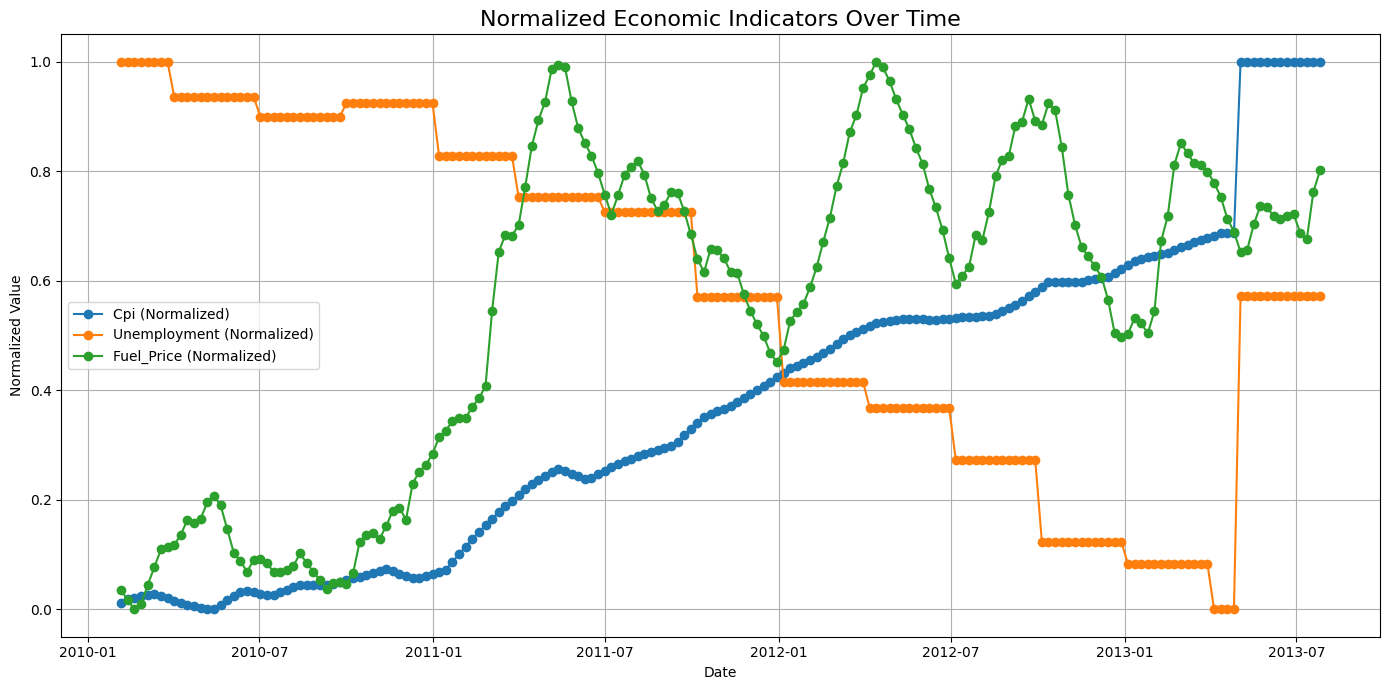

In [192]:

df_grouped = df_features.groupby('Date').mean().reset_index()

cols_to_normalize = ['CPI', 'Unemployment', 'Fuel_Price']

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(
    scaler.fit_transform(df_grouped[cols_to_normalize]),
    columns=[col + '_norm' for col in cols_to_normalize]
)

df_grouped = pd.concat([df_grouped, df_normalized], axis=1)

plt.figure(figsize=(14, 7))
for col in df_normalized.columns:
    plt.plot(df_grouped['Date'], df_grouped[col], marker='o', linestyle='-', label=col.replace('_norm', '').title() + " (Normalized)")

plt.title("Normalized Economic Indicators Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Normalized Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [193]:
df_features['Store'] = df_features['Store'].astype(str)
df_train['Store'] = df_train['Store'].astype(str)
df_stores['Store'] = df_stores['Store'].astype(str)

In [194]:
df_features['Unemployment'].fillna(df_features['Unemployment'].median(),inplace=True)
df_features['Temperature'].fillna(df_features['Temperature'].median(),inplace=True)


In [195]:
df = pd.merge(df_train, df_features, on=['Store', 'Date'], how='left', suffixes=('', '_feat'))


In [196]:
df=pd.merge(df,df_stores,on='Store', how='left')

In [197]:
outlier_stats = outlier_count_df(df)
print(outlier_stats)

         Column  Outlier_Count  Total_Values  Outlier_Percentage
0  Weekly_Sales          35521        421570                8.43
1  Unemployment          32114        421570                7.62
2     IsHoliday          29661        421570                7.04
3   Temperature             69        421570                0.02
4          Dept              0        421570                0.00
5    Fuel_Price              0        421570                0.00
6           CPI              0        421570                0.00
7          Size              0        421570                0.00


In [198]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.sort_values(by='Date', inplace=True)
df.set_index('Date', inplace=True)
print(df.index.is_monotonic_increasing)  
df.head()


True


,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_feat,Type,Size
Date,,,,,,,,,,,
2010-02-05,1,1,24924.50,0,42.31,2.572,211.096358,8.106,False,A,151315
2010-02-05,29,5,15552.08,0,24.36,2.788,131.527903,10.064,False,B,93638
2010-02-05,29,6,3200.22,0,24.36,2.788,131.527903,10.064,False,B,93638
2010-02-05,29,7,10820.05,0,24.36,2.788,131.527903,10.064,False,B,93638
2010-02-05,29,8,20055.64,0,24.36,2.788,131.527903,10.064,False,B,93638


In [199]:
df.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday_feat', 'Type', 'Size'],
      dtype='object')

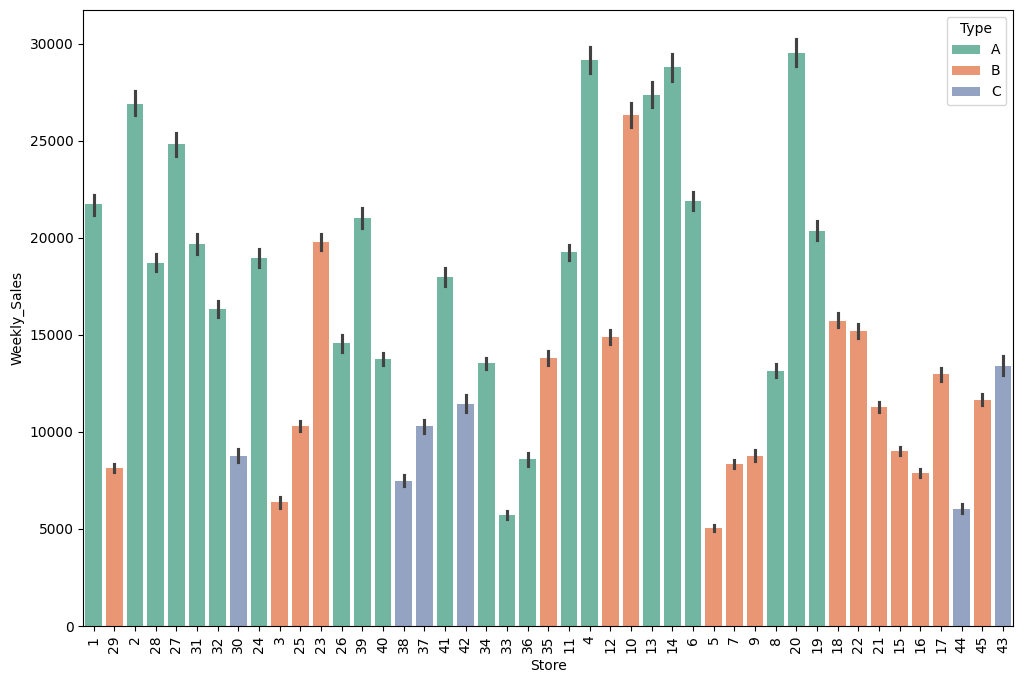

In [200]:
plt.figure(figsize=(12,8))
sns.barplot(
    x='Store', 
    y='Weekly_Sales', 
    hue='Type',   
    data=df,
    palette='Set2'
)
plt.xticks(rotation=90)
plt.show()

In [201]:


# sales_by_date = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

# plt.figure(figsize=(14,6))
# sns.lineplot(data=sales_by_date, x='Date', y='Weekly_Sales', color='royalblue', linewidth=2)
# plt.title('Total Weekly Sales Over Time', fontsize=16)
# plt.xlabel('Date', fontsize=14)
# plt.ylabel('Total Weekly Sales', fontsize=14)
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.show()


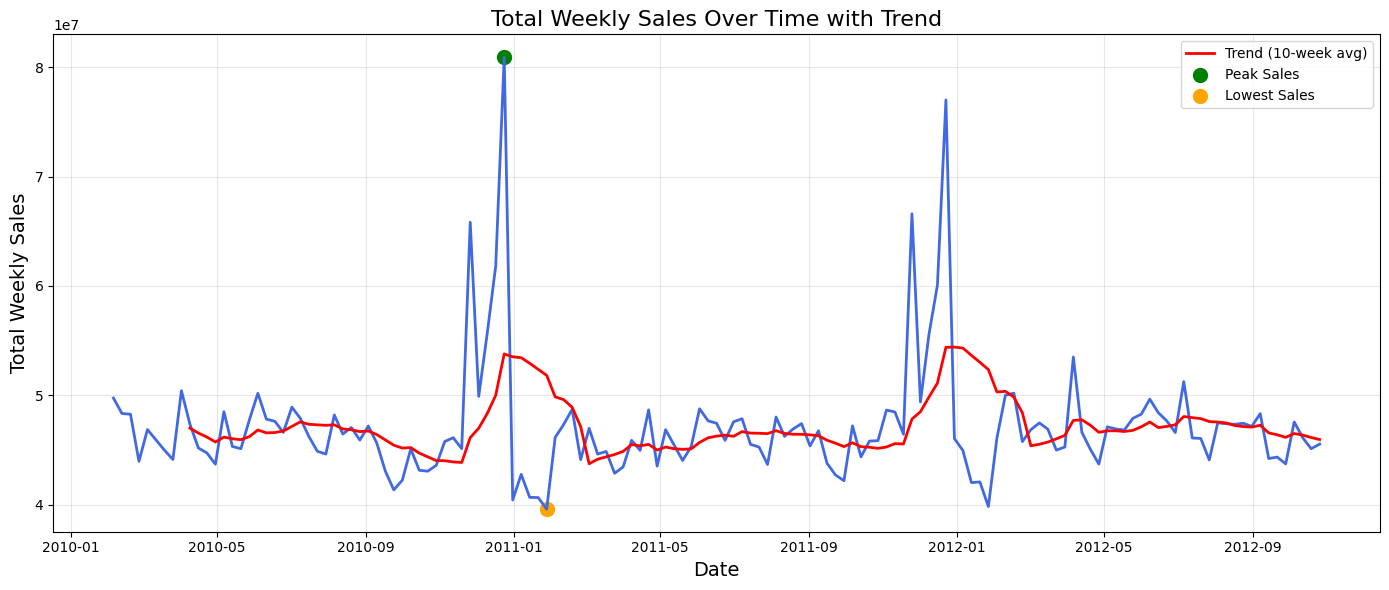

In [202]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sales_by_date = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=sales_by_date, x='Date', y='Weekly_Sales', color='royalblue', linewidth=2)

sales_by_date['Rolling_Mean'] = sales_by_date['Weekly_Sales'].rolling(window=10).mean()
sns.lineplot(data=sales_by_date, x='Date', y='Rolling_Mean', color='red', linewidth=2, label='Trend (10-week avg)')

max_point = sales_by_date.loc[sales_by_date['Weekly_Sales'].idxmax()]
min_point = sales_by_date.loc[sales_by_date['Weekly_Sales'].idxmin()]

plt.scatter(max_point['Date'], max_point['Weekly_Sales'], color='green', s=100, label='Peak Sales')
plt.scatter(min_point['Date'], min_point['Weekly_Sales'], color='orange', s=100, label='Lowest Sales')

plt.title('Total Weekly Sales Over Time with Trend', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Weekly Sales', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


In [203]:
df['rollingMean4'] = df['Weekly_Sales'].rolling(window=4).mean()
df['rollingMean8'] = df['Weekly_Sales'].rolling(window=8).mean()
df['rollingMean12'] = df['Weekly_Sales'].rolling(window=12).mean()


In [204]:
df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_feat,Type,Size,rollingMean4,rollingMean8,rollingMean12
Date,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,0,42.31,2.572,211.096358,8.106,False,A,151315,NaN,NaN,NaN
2010-02-05,29,5,15552.08,0,24.36,2.788,131.527903,10.064,False,B,93638,NaN,NaN,NaN
2010-02-05,29,6,3200.22,0,24.36,2.788,131.527903,10.064,False,B,93638,NaN,NaN,NaN
2010-02-05,29,7,10820.05,0,24.36,2.788,131.527903,10.064,False,B,93638,13624.2125,NaN,NaN
2010-02-05,29,8,20055.64,0,24.36,2.788,131.527903,10.064,False,B,93638,12406.9975,NaN,NaN


In [205]:
df = df.reset_index()


In [206]:
df.columns

Index(['Date', 'Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday_feat', 'Type', 'Size',
       'rollingMean4', 'rollingMean8', 'rollingMean12'],
      dtype='object')

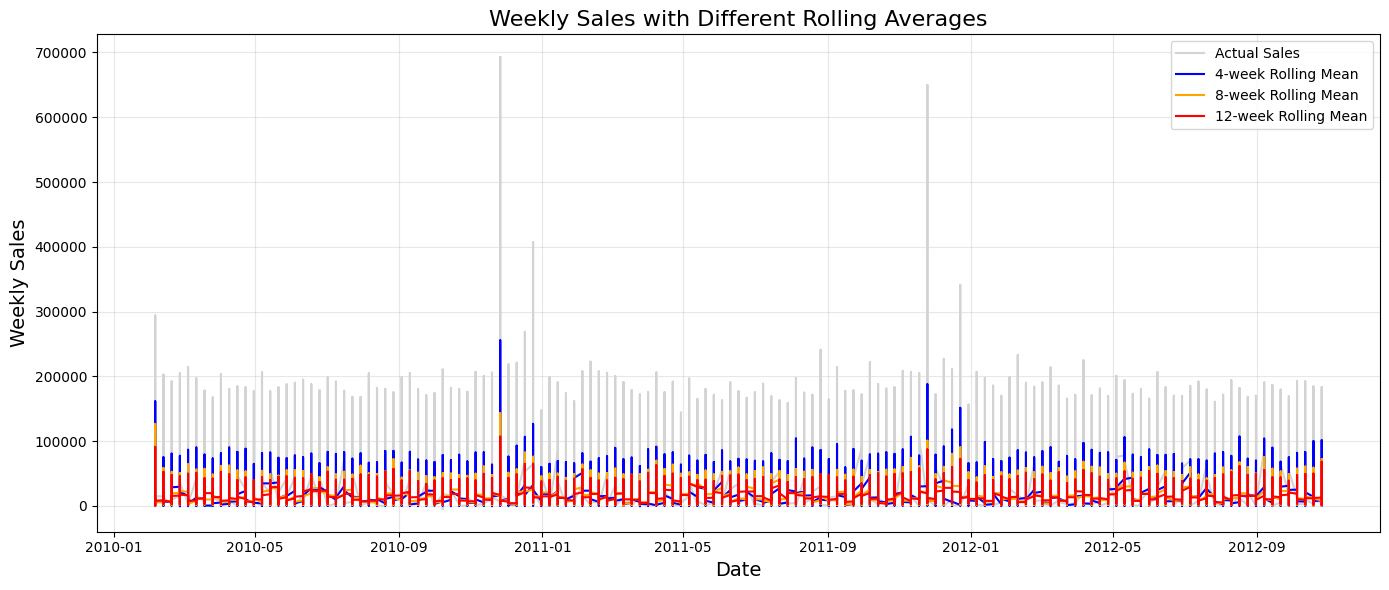

In [207]:
plt.figure(figsize=(14,6))

plt.plot(df['Date'], df['Weekly_Sales'], color='lightgray', label='Actual Sales')
plt.plot(df['Date'], df['rollingMean4'], color='blue', label='4-week Rolling Mean')
plt.plot(df['Date'], df['rollingMean8'], color='orange', label='8-week Rolling Mean')
plt.plot(df['Date'], df['rollingMean12'], color='red', label='12-week Rolling Mean')

plt.title('Weekly Sales with Different Rolling Averages', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


In [208]:
df['days']=df['Date'].dt.day
df['months']=df['Date'].dt.month
df['years']=df['Date'].dt.year
df['day_of_week'] = df['Date'].dt.dayofweek


In [209]:
df['lag1']=df['Weekly_Sales'].shift(1)
df['lag2']=df['Weekly_Sales'].shift(2)
df['lag3']=df['Weekly_Sales'].shift(3)



In [210]:
to_drop_na=["lag1",'lag2','lag3','rollingMean4', 'rollingMean8', 'rollingMean12']

In [211]:
df[to_drop_na].dropna(inplace=True)

Performing seasonal decomposition on 143 data points (period=30)...


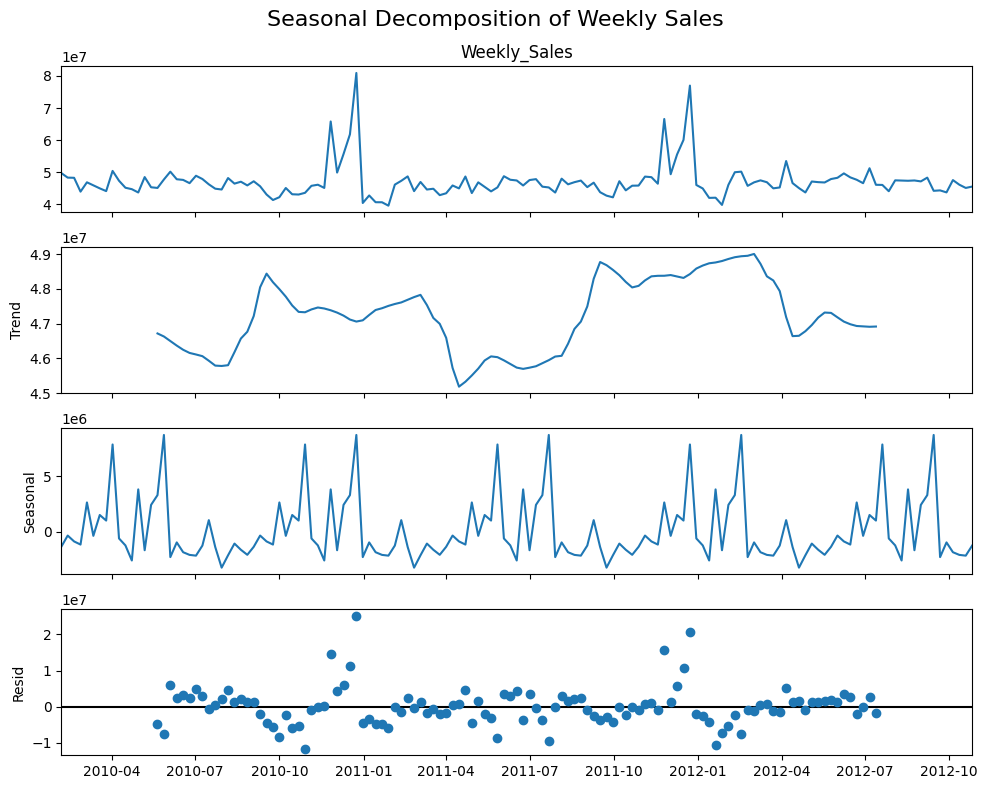

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

weekly_sales = (
    df.groupby('Date')['Weekly_Sales']
    .sum()
    .rename("Weekly_Sales")
)

weekly_sales.index = pd.to_datetime(weekly_sales.index)
weekly_sales = weekly_sales.sort_index()

if weekly_sales.shape[0] > 60:
    period = 30
    
    print(f"Performing seasonal decomposition on {weekly_sales.shape[0]} data points (period={period})...")
    
    decomposition = seasonal_decompose(weekly_sales, model='additive', period=period)
    
    fig = decomposition.plot()
    fig.set_size_inches(10, 8)
    fig.suptitle("Seasonal Decomposition of Weekly Sales", fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print(f"Skipping seasonal decomposition — only {weekly_sales.shape[0]} points available.")


In [213]:

cols_to_encode = ['Type', 'Dept']
encoder = OneHotEncoder(sparse_output=False, drop=None)  
encoded_array = encoder.fit_transform(df[cols_to_encode])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(cols_to_encode))
data_encoded = pd.concat([df.drop(columns=cols_to_encode), encoded_df], axis=1)


MemoryError: Unable to allocate 6.43 MiB for an array with shape (421570, 2) and data type int64

In [ ]:
df.columns

Index(['Date', 'Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday_feat', 'Type', 'Size',
       'rollingMean4', 'rollingMean8', 'rollingMean12', 'day_of_week', 'lag1',
       'lag2', 'lag3'],
      dtype='object')

In [ ]:
df_droped=df.drop(['Date', 'Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment',  'Type',   'days', 'months', 'years',
    ])

KeyError: "['Date', 'Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'days', 'months', 'years'] not found in axis"

In [ ]:
X=df.drop(columns=['Weekly_Sales'])
y=['weekly_sales']

In [ ]:
cols_to_add = [col for col in data.columns if col.startswith('Type_') or col.startswith('Dept_')]

training_features = training_features.reset_index(drop=True)
data = data.reset_index(drop=True)

training_features = pd.concat([training_features, data[cols_to_add]], axis=1)


NameError: name 'data' is not defined

In [ ]:
X.columns

Index(['Date', 'Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'IsHoliday_feat', 'Type', 'Size', 'rollingMean4',
       'rollingMean8', 'rollingMean12', 'days', 'months', 'years',
       'day_of_week', 'lag1', 'lag2', 'lag3'],
      dtype='object')